<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/analise-exploratoria-pre-processamento-de-dados/AEPD_Aula2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 02: Análise Exploratória de Dados - Prof. Tatiana Escovedo

## Pandas

O **NumPy** (https://numpy.org/) é um pacote fundamental para a computação científica com Python. Essa biblioteca fornece diversas funções matemáticas e um array multidimensional de alto desempenho que é utilizado como base para diversas operações, principalmente em manipulação de dados, e suas estruturas de dados básicas são arrays e matrizes.

O **Pandas** (https://pandas.pydata.org/) é um pacote construído sobre o NumPy, muito utilizado para manipular e analisar dados estruturados ou tabulares. Suas estruturas de dados principais são os *Dataframes* (matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas) e *Series* (uma única coluna, sendo que Dataframes possuem um ou mais *Series*). Esta biblioteca oferece uma funcionalidade de indexação que permite o "slice and dice" dos dados, agregações, seleção de subsets de dados, entre outros recursos para análise de dados.

Nesta aula, iremos utilizar o Pandas para realizarmos a Análise Exploratória de um dataset, focando em algumas possibilidades interessantes de análises, mas sem nenhuma pretensão de ser um tutorial exaustivo deste pacote, que é muito amplo e rico. Para conhecer mais sobre o Pandas, você pode explorar um dos diversos tutoriais oficiais, como o disponível em https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html.

Iniciaremos esta prática importando o pacote Pandas:

In [ ]:
# importação do Pandas
import pandas as pd

Agora iremos importar o dataset com que iremos utilizar a partir de um link, e armazenaremos os dados em um dataframe. Neste prática, trabalharemos com o dataset **Iris**, um dos datasets mais conhecidos e utilizados em Machine Learning, criado em 1936. Este é um dataset pequeno e simples, ideal para uma primeira prática, e contém 150 instâncias (linhas), 4 variáveis numéricas (largura e comprimento da sépala e da pétala em centímetros) e 1 variável categórica (espécie da flor, podendo ser setosa, versicolor ou virginica).

In [ ]:
# importando dados uma url para um dataframe

# url a importar
url_dados = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# labels dos atributos do dataset
labels_atributos = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'especie']

# carga do dataset através da url - há diversos parâmetros no read_csv que podem ser interessantes, como sep, usecols e header
iris = pd.read_csv(url_dados, names=labels_atributos)

Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

In [ ]:
# verificando que iris é um dataframe
type(iris)

pandas.core.frame.DataFrame

In [ ]:
# verificando os tipos de cada coluna do dataframe
iris.dtypes

comprimento_sepala    float64
largura_sepala        float64
comprimento_petala    float64
largura_petala        float64
especie                object
dtype: object

In [ ]:
# exibindo as primeiras linhas
iris.head()

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
0                 5.1             3.5                 1.4             0.2   
1                 4.9             3.0                 1.4             0.2   
2                 4.7             3.2                 1.3             0.2   
3                 4.6             3.1                 1.5             0.2   
4                 5.0             3.6                 1.4             0.2   

       especie  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [ ]:
# exibindo as últimas linhas
iris.tail()

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
145                 6.7             3.0                 5.2             2.3   
146                 6.3             2.5                 5.0             1.9   
147                 6.5             3.0                 5.2             2.0   
148                 6.2             3.4                 5.4             2.3   
149                 5.9             3.0                 5.1             1.8   

            especie  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [ ]:
# exibindo os nomes das colunas
iris.columns

Index(['comprimento_sepala', 'largura_sepala', 'comprimento_petala',
       'largura_petala', 'especie'],
      dtype='object')

In [ ]:
# exibindo as dimensões do dataset
iris.shape

(150, 5)

In [ ]:
# exibindo a quantidade de linhas por coluna
iris.count()

comprimento_sepala    150
largura_sepala        150
comprimento_petala    150
largura_petala        150
especie               150
dtype: int64

In [ ]:
# exibindo um sumário estatístico
iris.describe()

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala
count          150.000000      150.000000          150.000000      150.000000
mean             5.843333        3.054000            3.758667        1.198667
std              0.828066        0.433594            1.764420        0.763161
min              4.300000        2.000000            1.000000        0.100000
25%              5.100000        2.800000            1.600000        0.300000
50%              5.800000        3.000000            4.350000        1.300000
75%              6.400000        3.300000            5.100000        1.800000
max              7.900000        4.400000            6.900000        2.500000

A fim de analisarmos os nossos dados de diversos ângulos, o Pandas permite reorganizarmos um dataframe, por exemplo, ordenando-o por alguma coluna. Também podemos selecionar uma ou mais colunas e/ou linha específicas, como mostram os exemplos a seguir. Os comentários nos blocos de código auxiliam no seu entendimento.

In [ ]:
# ordenando o dataframe por uma coluna
iris.sort_values(by='largura_sepala')

# obs: este comando retorna apenas o resultado da query. Se quisermos alterar a ordenação do dataframe em si,
# teríamos que fazer: iris = iris.sort_values(by='largura_sepala')

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
60                  5.0             2.0                 3.5             1.0   
62                  6.0             2.2                 4.0             1.0   
119                 6.0             2.2                 5.0             1.5   
68                  6.2             2.2                 4.5             1.5   
41                  4.5             2.3                 1.3             0.3   
..                  ...             ...                 ...             ...   
16                  5.4             3.9                 1.3             0.4   
14                  5.8             4.0                 1.2             0.2   
32                  5.2             4.1                 1.5             0.1   
33                  5.5             4.2                 1.4             0.2   
15                  5.7             4.4                 1.5             0.4   

             especie  
60   Iris-versicolor  
62   Iris-versicolor  
119   Iris-virginica  
68   Iris-versicolor  
41       Iris-setosa  
..               ...  
16       Iris-setosa  
14       Iris-setosa  
32       Iris-setosa  
33       Iris-setosa  
15       Iris-setosa  

[150 rows x 5 columns]

In [ ]:
# ordenando por uma coluna de ordem descendente
iris.sort_values(by='largura_sepala', ascending=False)

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
15                  5.7             4.4                 1.5             0.4   
33                  5.5             4.2                 1.4             0.2   
32                  5.2             4.1                 1.5             0.1   
14                  5.8             4.0                 1.2             0.2   
16                  5.4             3.9                 1.3             0.4   
..                  ...             ...                 ...             ...   
87                  6.3             2.3                 4.4             1.3   
62                  6.0             2.2                 4.0             1.0   
68                  6.2             2.2                 4.5             1.5   
119                 6.0             2.2                 5.0             1.5   
60                  5.0             2.0                 3.5             1.0   

             especie  
15       Iris-setosa  
33       Iris-setosa  
32       Iris-setosa  
14       Iris-setosa  
16       Iris-setosa  
..               ...  
87   Iris-versicolor  
62   Iris-versicolor  
68   Iris-versicolor  
119   Iris-virginica  
60   Iris-versicolor  

[150 rows x 5 columns]

In [ ]:
# selecionando uma coluna específica
iris['largura_sepala']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: largura_sepala, Length: 150, dtype: float64

In [ ]:
# selecionando um subconjunto de linhas consecutivas
iris[7:11]

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
7                  5.0             3.4                 1.5             0.2   
8                  4.4             2.9                 1.4             0.2   
9                  4.9             3.1                 1.5             0.1   
10                 5.4             3.7                 1.5             0.2   

        especie  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa

In [ ]:
# selecionando um subconjunto de colunas para todas as linhas
iris.loc[:, ['largura_sepala', 'largura_petala', 'especie']]

largura_sepala  largura_petala         especie
0               3.5             0.2     Iris-setosa
1               3.0             0.2     Iris-setosa
2               3.2             0.2     Iris-setosa
3               3.1             0.2     Iris-setosa
4               3.6             0.2     Iris-setosa
..              ...             ...             ...
145             3.0             2.3  Iris-virginica
146             2.5             1.9  Iris-virginica
147             3.0             2.0  Iris-virginica
148             3.4             2.3  Iris-virginica
149             3.0             1.8  Iris-virginica

[150 rows x 3 columns]

In [ ]:
# selecionando um subconjunto linhas e colunas
iris.loc[7:11, ['largura_sepala', 'largura_petala', 'especie']]

largura_sepala  largura_petala      especie
7              3.4             0.2  Iris-setosa
8              2.9             0.2  Iris-setosa
9              3.1             0.1  Iris-setosa
10             3.7             0.2  Iris-setosa
11             3.4             0.2  Iris-setosa

In [ ]:
# selecionando linhas segundo um critério
iris[iris['largura_sepala'] > 3.5]

comprimento_sepala  largura_sepala  comprimento_petala  largura_petala  \
4                   5.0             3.6                 1.4             0.2   
5                   5.4             3.9                 1.7             0.4   
10                  5.4             3.7                 1.5             0.2   
14                  5.8             4.0                 1.2             0.2   
15                  5.7             4.4                 1.5             0.4   
16                  5.4             3.9                 1.3             0.4   
18                  5.7             3.8                 1.7             0.3   
19                  5.1             3.8                 1.5             0.3   
21                  5.1             3.7                 1.5             0.4   
22                  4.6             3.6                 1.0             0.2   
32                  5.2             4.1                 1.5             0.1   
33                  5.5             4.2                 1.4             0.2   
44                  5.1             3.8                 1.9             0.4   
46                  5.1             3.8                 1.6             0.2   
48                  5.3             3.7                 1.5             0.2   
109                 7.2             3.6                 6.1             2.5   
117                 7.7             3.8                 6.7             2.2   
131                 7.9             3.8                 6.4             2.0   

            especie  
4       Iris-setosa  
5       Iris-setosa  
10      Iris-setosa  
14      Iris-setosa  
15      Iris-setosa  
16      Iris-setosa  
18      Iris-setosa  
19      Iris-setosa  
21      Iris-setosa  
22      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
44      Iris-setosa  
46      Iris-setosa  
48      Iris-setosa  
109  Iris-virginica  
117  Iris-virginica  
131  Iris-virginica

In [ ]:
# exibindo a média de cada atributo, agrupado por espécie
iris.groupby('especie').mean()

comprimento_sepala  largura_sepala  comprimento_petala  \
especie                                                                   
Iris-setosa                   5.006           3.418               1.464   
Iris-versicolor               5.936           2.770               4.260   
Iris-virginica                6.588           2.974               5.552   

                 largura_petala  
especie                          
Iris-setosa               0.244  
Iris-versicolor           1.326  
Iris-virginica            2.026

## Matplotlib

O **Matplotlib** (https://matplotlib.org/) é um pacote que fornece uma API que é utilizada por diversas outras bibliotecas de plotagem gráfica. É uma excelente biblioteca para criar gráficos básicos como gráficos de linhas, gráficos de barras, histogramas e muitos outros. Este pacote apresentar um baixo nível de implementação e, portanto, possibilita um alto nível de customização dos seus gráficos.

Agora que já exploramos um pouco os nossos dados com auxílio da Estatística Descritiva e da biblioteca Pandas, vamos examinar o dataset Iris graficamente com a biblioteca Matplotlib.

O primeiro tipo de gráfico que criaremos será o gráfico conhecido como *scatterplot*, no qual são marcados os pontos de cruzamento entre duas variáveis. Para isso, será necessário importar o módulo pyplot do Matplotlib.

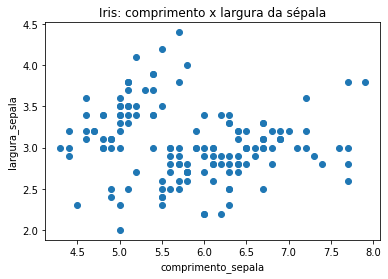

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico de comprimento x largura da sépala
plt.scatter(iris['comprimento_sepala'], iris['largura_sepala'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Iris: comprimento x largura da sépala')
plt.xlabel('comprimento_sepala')
plt.ylabel('largura_sepala');

Se quisermos, também podemos plotar o mesmo gráfico, mas colori-lo de acordo com as espécies das flores (setosa, versicolor ou virginica). Para tal, faremos:

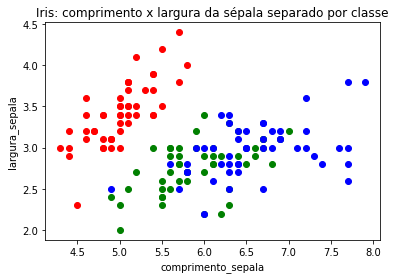

In [ ]:
# criando o dicionário de cores
cores = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}

# plotando cada um dos pontos de dados
for i in range(len(iris['comprimento_sepala'])):
    plt.scatter(iris['comprimento_sepala'][i], iris['largura_sepala'][i], color=cores[iris['especie'][i]])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Iris: comprimento x largura da sépala separado por classe')
plt.xlabel('comprimento_sepala')
plt.ylabel('largura_sepala');

Também podemos separar as classes no *scatterplot* usando diferentes marcadores em vez de usar cores (o que é útil em relatórios impressos em preto e branco). Para tal, basta fazer:

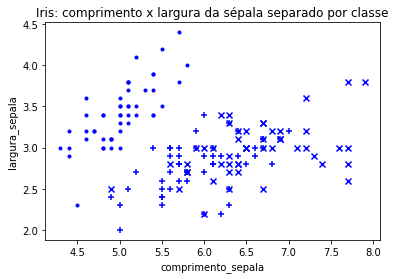

In [ ]:
# criando o dicionário de marcadores
marcadores = {'Iris-setosa':'.', 'Iris-versicolor':'+', 'Iris-virginica':'x'}

# plotando cada um dos pontos de dados
for i in range(len(iris['comprimento_sepala'])):
   plt.scatter(iris['comprimento_sepala'][i], iris['largura_sepala'][i], color='blue', marker=marcadores[iris['especie'][i]])

# incluindo título do gráfico e rótulos dos eixos
plt.title('Iris: comprimento x largura da sépala separado por classe')
plt.xlabel('comprimento_sepala')
plt.ylabel('largura_sepala');

Vamos agora trabalhar com um tipo diferente de gráficos: o **gráfico de linhas** (*line plot*). Este tipo de gráfico é utilizado geralmente quando estamos interessados em expressar variáveis que representam passagem de tempo, ou seja, mostrar a evolução histórica. Imagine que nosso dataset Iris esteja representado na ordem em que as amostras foram coletadas ao longo do tempo e queremos visualizar a variação dos atributos dos exemplos coletados ao longo do tempo. Neste caso, faríamos:

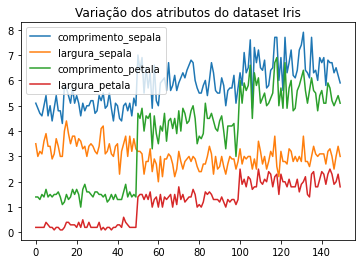

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = iris.columns.drop(['especie'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset iris - de 0 a 149
x_data = range(0, iris.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala']
    plt.plot(x_data, iris[atributo], label=atributo)

# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset Iris')
plt.legend();

O **histograma** exibe a distribuição de frequências de uma determinada variável. É possível informarmos como parâmetro (entre muitas outras possibilidades) o número de bins, ou de colunas, que queremos exibir. O exemplo de código a seguir cria um histograma para o atributo comprimento da sépala, com 7 bins.

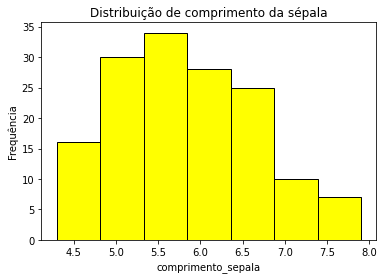

In [ ]:
# Histograma

# plotando o histograma
plt.hist(iris['comprimento_sepala'], bins=7, edgecolor='black', color='yellow')

# incluindo título do gráfico e legenda
plt.title('Distribuição de comprimento da sépala')
plt.ylabel('Frequência')
plt.xlabel('comprimento_sepala');

Por sua vez, o **gráfico de barras** (*bar plot*) apresenta retângulos (barras), com uma das dimensões proporcional à quantidade a ser representada e a outra arbitrária, mas igual para todas as barras. Os exemplos a seguir ilustram gráficos de barras (o primeiro, com barras verticais, também chamado de gráfico de colunas; e o segundo, com barras horizontais) para um dataset simples, que representa a profissão dos respondentes de uma pesquisa fictícia.

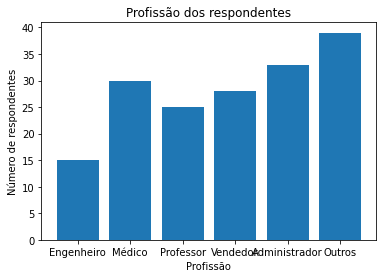

In [ ]:
# Atribuindo os valores de x e y
profissoes = ['Engenheiro', 'Médico', 'Professor', 'Vendedor', 'Administrador', 'Outros']
quantidade = [15, 30, 25, 28, 33, 39]

# Gráfico de Barras

# criando o gráfico de colunas
plt.bar(profissoes, quantidade)

# incluindo título do gráfico e legenda
plt.title("Profissão dos respondentes")
plt.xlabel("Profissão")
plt.ylabel("Número de respondentes");

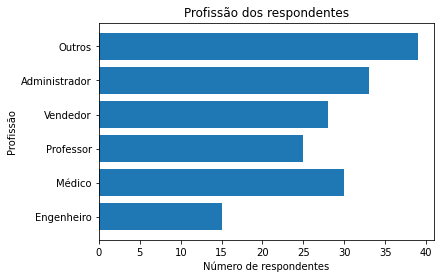

In [ ]:
# Gráfico de Barras Horizontal

# criando o gráfico de barras
plt.barh(profissoes, quantidade)

# incluindo título do gráfico e legenda
plt.title("Profissão dos respondentes")
plt.xlabel("Número de respondentes")
plt.ylabel("Profissão");

Outra visualização interessante para quantidades de uma variável é o **gráfico de pizza** (*pie plot*). Vejamos este gráfico com os mesmos dados do exemplo anterior:

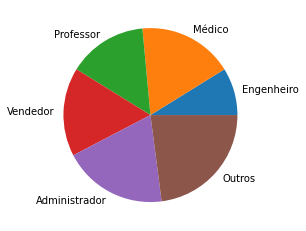

In [ ]:
# criando o gráfico de pizza
plt.pie(quantidade, labels = profissoes);

Para finalizar os exemplos da biblioteca Matplotlib, vamos plotar, em uma única figura, quatro histogramas do dataset Iris, um para cada atributo:

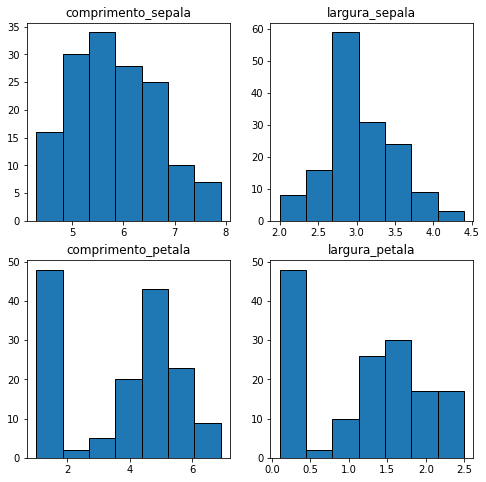

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: histograma do comprimento_sepala
ax[0,0].hist(iris['comprimento_sepala'], bins=7, edgecolor='black')
ax[0,0].set_title("comprimento_sepala")

# subplot2: histograma da largura_sepala
ax[0,1].hist(iris['largura_sepala'], bins=7, edgecolor='black')
ax[0,1].set_title("largura_sepala")

# subplot3: histograma do comprimento_petala
ax[1,0].hist(iris['comprimento_petala'], bins=7, edgecolor='black')
ax[1,0].set_title("comprimento_petala")

# subplot4: histograma da largura_petala
ax[1,1].hist(iris['largura_petala'], bins=7, edgecolor='black');
ax[1,1].set_title("largura_petala");

Poderíamos fazer o mesmo do exemplo anterior, substituindo os histogramas por **boxplots**.

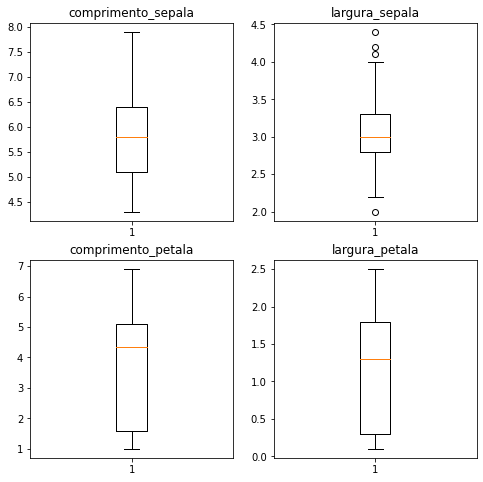

In [ ]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: boxplot do comprimento_sepala
ax[0,0].boxplot(iris['comprimento_sepala'])
ax[0,0].set_title("comprimento_sepala")

# subplot2: boxplot da largura_sepala
ax[0,1].boxplot(iris['largura_sepala'])
ax[0,1].set_title("largura_sepala")

# subplot3: boxplot do comprimento_petala
ax[1,0].boxplot(iris['comprimento_petala'])
ax[1,0].set_title("comprimento_petala")

# subplot4: boxplot da largura_petala
ax[1,1].boxplot(iris['largura_petala']);
ax[1,1].set_title("largura_petala");

É importante ressaltar que a biblioteca Matplotlib é muito extensa e seus gráficos são altamente configuráveis. Neste notebook, procuramos trazer apenas exemplos simples para facilitar o entendimento dos códigos. Entretanto, praticamente tudo pode ser customizado, desde configurações mais simples como cores, tamanhos ou exibição de labels, e até outras personalizações mais avançadas. Recomendamos que você procure estas opções na documentação oficial de acordo com a sua necessidade de uso.

## Seaborn

O **Seaborn** (https://seaborn.pydata.org/) é uma biblioteca de visualização baseada em Matplotlib, que oferece uma interface de alto nível para a criação de gráficos atrativos, profissionais e com análises estatísticas. Com ela, é possível escrever em uma linha um gráfico que precisaria de diversas linhas usando apenas Matplotlib. Os métodos de visualização da biblioteca Seaborn têm uma sintaxe mais simples, porém são mais limitados, sendo necessário utilizar a biblioteca Matplotlib para customizações adicionais.

Todos os exemplos a seguir utilizarão o dataset Iris, que já carregamos previamente. Você notará que os três primeiros exemplos de gráficos com Seaborn produzem o mesmo resultado de alguns gráficos que criamos com a Matplotlib. Vamos começar importando a biblioteca.

In [ ]:
# importação do Seaborn
import seaborn as sns

Agora vamos plotar um *scatter plot* simples, o mesmo *scatter plot* colorido por espécies e um gráfico de linhas com os atributos do dataset Iris. Repare que são necessárias bem menos linhas de código em comparação com o Matplotlib:

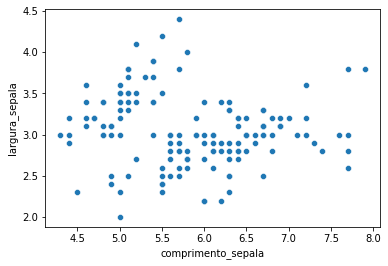

In [ ]:
# scatter plot com Seaborn
sns.scatterplot(x='comprimento_sepala', y='largura_sepala', data=iris);

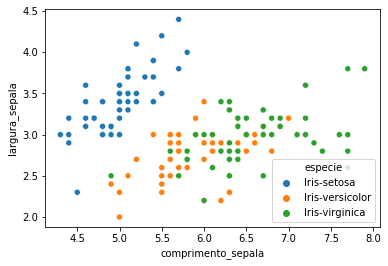

In [ ]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='comprimento_sepala', y='largura_sepala', hue='especie', data=iris);

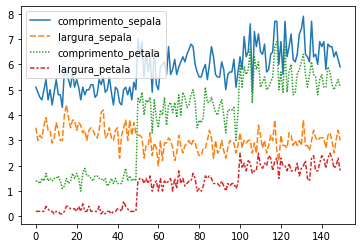

In [ ]:
# gráfico de linhas com Seaborn
sns.lineplot(data=iris.drop(['especie'], axis=1));

Vejamos um exemplo do gráfico boxplot com a biblioteca Seaborn, exbindo os boxplots de todos os atributos em um mesmo gráfico.

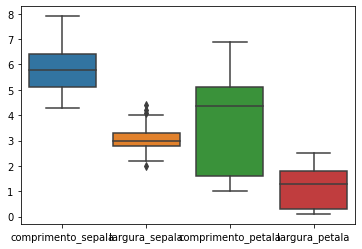

In [ ]:
# boxplot com Seaborn
sns.boxplot(data = iris);

Agora vamos plotar um histograma do comprimento da sépala.

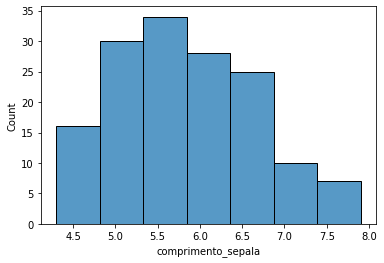

In [ ]:
# histograma com seaborn
sns.histplot(iris['comprimento_sepala'], bins=7);

Podemos também plotar boxplots simples facilmente:

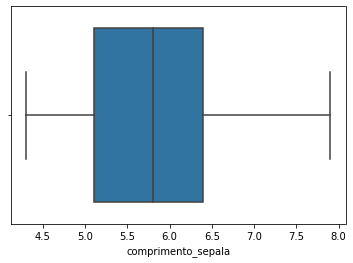

In [ ]:
# boxplot com seaborn
sns.boxplot(x=iris['comprimento_sepala']);

Um gráfico muito útil para a análise de dados é o **gráfico de correlação**, que exibe graficamente as correlações entre os atributos numéricos de um dataset. Com Seaborn, basta uma linha de código para plotá-la. Para fazer algo similar com Matplotlib são necessárias diversas linhas de código.

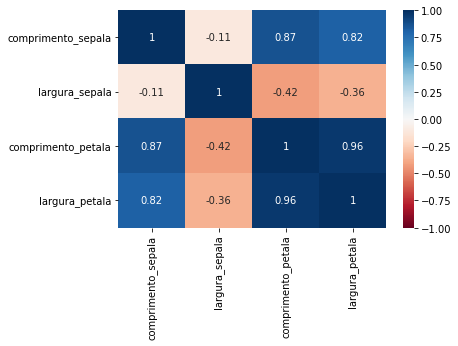

In [ ]:
# gráfico de correlação com Seaborn
sns.heatmap(iris.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Para finalizar, vamos plotar um gráfico composto muito interessante que apresenta, em uma só figura, scatter plots de cada par de atributos numéricos do dataset e o histograma do atributo na diagonal principal. Se configurarmos o parâmetro hue, em vez do histograma, o gráfico exibirá na diagonal principal a distribuição de cada uma das espécies pelo atributo, usando density plots. Os dois exemplos são exibidos a seguir. Repare que basta uma única linha de código para que este gráfico tão interessante seja exibido.

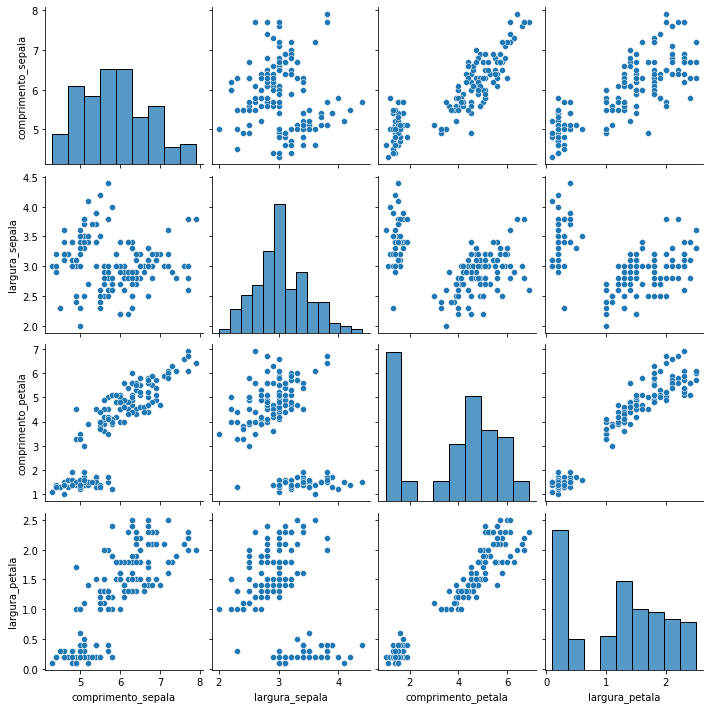

In [ ]:
# pair plot 1 com Seaborn
sns.pairplot(iris);

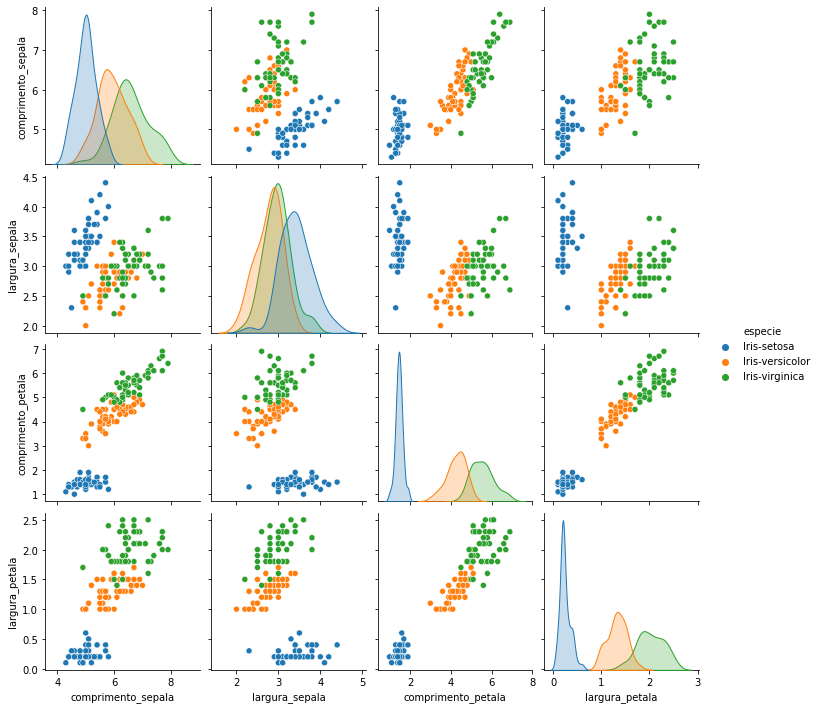

In [ ]:
# pair plot 2 com Seaborn
sns.pairplot(iris, hue = "especie");

Assim como a Matplotlib, a biblioteca Seaborn é muito extensa e seus gráficos podem ser personalizados de acordo com sua necessidade. Recomendamos que você explore mais exemplos na documentação oficial de acordo com a sua necessidade de uso.